## Curso - Pandas: selecionando e agrupando dados
Este notebook contém exercícios da etapa 3 da formação em Data Science com Python da Alura
Link: https://cursos.alura.com.br/course/pandas-selecao-agrupamento-dados

Link para o dataset utilizado: https://seeg.eco.br/dados/

### 01. Conhecendo os dados

In [2]:
# Importando os dados
import pandas as pd

data = pd.read_excel('1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name='GEE Estados')
data.head()

c:\Users\João\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

#### Ajustando a base

Estou interessado somente na emissão dos gases gerados pelos estados que estejam no inventário nacional, então preciso identificar os tipos de dados únicos da coluna 'Emissão / Remoção / Bunker'

**Informações tiradas do site do SEEG:**
* Remoções são dados referentes à retirada dos gases estufa, que é contrário da emissão. (Não preciso)
* NCI são dados não contemplados no invetário nacional. (Não preciso)
* Bunkers são emissões de transporte marítimo e aéreo internacional, portanto não são emissões diretas dos estados. (Não preciso)

In [4]:
data['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

In [5]:
(data['Emissão / Remoção / Bunker'] == 'Remoção NCI') | (data['Emissão / Remoção / Bunker'] == 'Remoção')

0         False
1         False
2         False
3         False
4         False
          ...  
103307    False
103308    False
103309    False
103310    False
103311    False
Name: Emissão / Remoção / Bunker, Length: 103312, dtype: bool

In [6]:
data[data['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção'])]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR4,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR6,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [7]:
data.loc[data['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [8]:
data.loc[data['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021].max()

1970    0.0
1971    0.0
1972    0.0
1973    0.0
1974    0.0
1975    0.0
1976    0.0
1977    0.0
1978    0.0
1979    0.0
1980    0.0
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
dtype: float64

In [9]:
# Checando se algum valor Bunker corresponde a alguma emissão feita por estado.
data.loc[data['Emissão / Remoção / Bunker'] == 'Bunker', 'Estado'].unique()

# Obtemos que não, e isso está correto, pois as Emissões do tipo Bunker são feitas por navegações marítimas e aéreas Internacionais, ou seja, não correspondem a nenhum estado.

array([nan], dtype=object)

In [10]:
# Eliminando essa informação da base

data = data[data['Emissão / Remoção / Bunker'] == 'Emissão']
data
# Vemos que ao limpar a base deixando somente valores de Emissão, restaram 94748 registros do que antes eram 103312

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,MS,AGROPEC,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MT,AGROPEC,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MS,AGROPEC,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,N2O (t),MT,AGROPEC,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


Como já filtrei a coluna Emissão / Remoção / Bunker, agora já não há mais informações relevantes nessa coluna, portando vou dropar ela.

In [11]:
data = data.drop(columns='Emissão / Remoção / Bunker')
data

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


### 02. Agrupamento de dados

Objetivo: analisar as emissões por tipo de gás que temos na base de dados.

Para isso, vou remodelar o DF.

Como:
* Uma única coluna com as informações dos anos
* Apenas uma coluna com os dados de emissão

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94748 entries, 0 to 103245
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nível 1 - Setor      94748 non-null  object 
 1   Nível 2              94748 non-null  object 
 2   Nível 3              94689 non-null  object 
 3   Nível 4              82422 non-null  object 
 4   Nível 5              92290 non-null  object 
 5   Nível 6              89207 non-null  object 
 6   Gás                  94748 non-null  object 
 7   Estado               88852 non-null  object 
 8   Atividade Econômica  94703 non-null  object 
 9   Produto              36198 non-null  object 
 10  1970                 94748 non-null  float64
 11  1971                 94748 non-null  float64
 12  1972                 94748 non-null  float64
 13  1973                 94748 non-null  float64
 14  1974                 94748 non-null  float64
 15  1975                 94748 non-null  flo

Conforme acima, vemos que a coluna dos anos começa a partir da coluna 11 até a 62. Então até a coluna 10 vou manter o mesmo formato

In [13]:
# Selecionando as colunas iniciais
data.loc[:, 'Nível 1 - Setor':'Produto'].columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto'],
      dtype='object')

In [14]:
# Armazenando
colunas_info = list(data.loc[:, 'Nível 1 - Setor':'Produto'].columns)
colunas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [15]:
data.loc[:, 1970:2021].columns

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [16]:
colunas_emissao = list(data.loc[:, 1970:2021].columns)
colunas_emissao

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

Para realizar a transformação do DF, uso o método melt(). Ele tem como objetivo transformar o Data Frame de um formato wide para um formato longo.

In [17]:
data.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano', value_name = 'Emissão')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


Como forma mais segura de trabalhar armazenarei esse novo dataframe em outra variável para trabalhar com os dados.

In [18]:
emissoes_por_ano = data.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano', value_name = 'Emissão')

In [19]:
emissoes_por_ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


**Analisando os gases**

Análise para ver a quantidade de emissão total por cada tipo de gás. Como o DF virou um DF *normalizado*, ou longo, as informações de gás estão repetidas e para realiar essa análise usarei a função groupby() do pandas.

In [20]:
emissoes_por_ano.groupby('Gás') # Criando agrupamento

In [21]:
emissoes_por_ano.groupby('Gás').groups  # Obtendo as informações do agrupamento - retorna um dicionário com cada gás e a localização dos seus dados

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 95158, 95159, 95160, 95173, 95174, 95175, 189906, 189907, 189908, 189921, 189922, 189923, 284654, 284655, 284656, 284669, 284670, 284671, 379402, 379403, 379404, 379417, 379418, 379419, 474150, 474151, 474152, 474165, 474166, 474167, 568898, 568899, 568900, 568913, 568914, 568915, 663646, 663647, 663648, 663661, 663662, 663663, 758394, 758395, 758396, 758409, 758410, 758411, 853142, 853143, 853144, 853157, 853158, 853159, 947890, 947891, 947892, 947905, 947906, 947907, 1042638, 1042639, 1042640, 1042653, 1042654, 1042655, 1137386, 1137387, 1137388, 1137401, 1137402, 1137403, 1232134, 1232135, 1232136, 1232149, 1232150, 1232151, 1326882, 1326883, 1326884, 1326897, 1326898, 1326899, 1421630, 1421631, 1421632, 1421645, 1421646, 1421647, 1516378, 1516379, 1516380, 1516393, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 95155, 95156, 95157, 95170, 95171, 95172, 189903, 189904, 189905, 189918, 189919, 189920, 284651, 284652, 284653, 284666, 284667

In [22]:
emissoes_por_ano.groupby('Gás').get_group('CO2 (t)')   # Pegando informações de um gás específico

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,0.000000
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),RJ,OUTRA_IND,NaN,1970,0.000000
26,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),MG,OUTRA_IND,NaN,1970,0.000000
29,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,10742.465792
32,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),SE,OUTRA_IND,NaN,1970,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4926255,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Outras Mudanças de uso da terra,Uso agropecuário -- Uso agropecuário,CO2 (t),MS,AGROPEC,NaN,2021,0.000000
4926272,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MT,AGROPEC,NaN,2021,374.000000
4926273,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MS,AGROPEC,NaN,2021,8613.000000
4926290,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Vegetação não florestal se...,CO2 (t),MT,AGROPEC,NaN,2021,934.000000


Acima eu puxei somente a informação do gás CO2 (t), mas agora quero fazer esse levantamento de todos os gases e a sua soma total de emissão.

Para isso, utilizarei a função de agregação sum().

In [23]:
emissoes_por_ano.groupby('Gás').sum(numeric_only=True)

# O parâmetro numeric_only garante que o pandas vai somar somente colunas com valores numéricos.

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [24]:
# Outra forma de fazer - e mais correta - é indicar exatamente qual coluna queremos selecionar para fazer essa somatória.
# No caso desse DF não houve problema pois é a única coluna com valores numéricos a serem somados, mas:

emissoes_por_ano.groupby('Gás')[['Emissão']].sum()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [25]:
# Ordenando pelos valores de 'Emissão' e não por ordem alfabética de 'Gás':

emissao_por_gas = emissoes_por_ano.groupby('Gás')[['Emissão']].sum().sort_values('Emissão', ascending=False)
emissao_por_gas

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


Os valores estão com uma legibilidade difícil, pois estão em notação científica.

Vamos gerar um gráfico para a melhor visualização.

In [26]:
import plotly.express as px

# Trazendo Gás do índice para uma coluna, para que o plotly entenda:
if emissao_por_gas.index.name == "Gás":
    emissao_por_gas = emissao_por_gas.reset_index()

fig = px.bar(
    emissao_por_gas,
    x="Gás",
    y="Emissão",
    title="Emissões por Gás",
)

# (opcional) Melhorarando a leitura
fig.update_xaxes(tickangle=45)
fig.show()

Analisando a proporção da emisão de gases CO2 com outros gases.

In [27]:
emissao_por_gas.iloc[0:9]

,Gás,Emissão
0,CO2e (t) GWP-AR5,8.181375e+10
1,CO2e (t) GWP-AR6,8.132316e+10
2,CO2e (t) GWP-AR4,8.015921e+10
3,CO2e (t) GWP-AR2,7.720596e+10
4,CO2e (t) GTP-AR4,6.344612e+10
5,CO2e (t) GTP-AR2,6.344612e+10
6,CO2e (t) GTP-AR6,6.247859e+10
7,CO2e (t) GTP-AR5,6.182200e+10
8,CO2 (t),5.324636e+10


In [28]:
# garantindo que é numérico
emissao = pd.to_numeric(emissao_por_gas['Emissão'], errors='coerce')

total = emissao.sum()
co2   = emissao_por_gas.loc[
    emissao_por_gas['Gás'].str.match(r'^CO2(\b|e\b)'), 'Emissão' # \b para no C02 e e\b cobre o caso do CO2e
].astype(float).sum()

pct = co2 / total * 100
print(f"A emissão de CO2 corresponde a {pct:.2f}% do total (1970–2021).")


A emissão de CO2 corresponde a 99.74% do total (1970–2021).


### 03. Agrupamentos multi-index

Objetivo: agrupar dados com base em não só 1, mas DUAS colunas do data frame ao mesmo tmepo.

* Descobrir quais são os setores econômicos mais poluentes para cada tipo de gás  
* Quais são os gases mais poluentes para cada setor econômico

In [29]:
# Agrupa por Gás e Nível 1 - Setor e soma a Emissão
gas_por_setor = emissoes_por_ano.groupby(['Gás', 'Nível 1 - Setor'])[['Emissão']].sum()
gas_por_setor

# Retorna uma tabela multi index

Emissão
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             9.361215e+07
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

Para descobrir o setor que emite a maior quantidade de CO2, podemos realizar uma seleção específica do gás CO2 com o uso do método cross-section (xs()), extraindo a partir disso o valor máximo e índice máximo com os métodos max()e idmax()

In [30]:
# Identificando o Gás mais poluente por setor
gas_por_setor.xs('CO2 (t)', level = 0)

,Emissão
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [31]:
# Selecionando somente o setor que tem maior emissão de CO2
gas_por_setor.xs(('CO2 (t)', 'Mudança de Uso da Terra e Floresta'), level =[0, 1])

,,Emissão
Gás,Nível 1 - Setor,
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10


In [32]:
# Selecionando de forma mais automática com .max()
gas_por_setor.xs('CO2 (t)', level = 0).max()

Emissão    3.733930e+10
dtype: float64

In [33]:
# Usando o .idxmax()
gas_por_setor.xs('CO2 (t)', level = 0).idxmax()

Emissão    Mudança de Uso da Terra e Floresta
dtype: object

Agora vamos agrupar as informações da tabela 'gas_por_setor' pelo tipo de gás.

In [34]:
# Agrupa por Gás (0) e obtem índice de onde tem mais emissão 
gas_por_setor.groupby(level = 0).idxmax()

,Emissão
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


In [35]:
# Agrupa por Gás (0) e traz o valor máximo da emissão
gas_por_setor.groupby(level = 0).max()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),5.928481e+08
CO (t),3.959769e+08
CO2 (t),3.733930e+10
CO2e (t) GTP-AR2,3.850044e+10
CO2e (t) GTP-AR4,3.850044e+10
CO2e (t) GTP-AR5,3.831675e+10
CO2e (t) GTP-AR6,3.843359e+10


Agora vamos juntar as informações da quantidade máxima de emissão ao à tabela de Gás, Setor que mais emite.

In [36]:
# Armazenando o valor da emissão

valores_max = gas_por_setor.groupby(level = 0).max().values

In [37]:
# Criando a tabela sumarizada

tabela_sumarizada = gas_por_setor.groupby(level = 0).idxmax()
tabela_sumarizada.insert(1, 'Quantidade máxima de emissão', valores_max)
tabela_sumarizada

,Emissão,Quantidade máxima de emissão
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


In [38]:
gas_por_setor.swaplevel(0, 1)

Emissão
Nível 1 - Setor                    Gás                   
Processos Industriais              C2F6 (t)  5.765018e+02
                                   CF4 (t)   7.135481e+03
Agropecuária                       CH4 (t)   5.928481e+08
Energia                            CH4 (t)   3.429034e+07
Mudança de Uso da Terra e Floresta CH4 (t)   8.662166e+07
...                                                   ...
Resíduos                           N2O (t)   2.764127e+05
Agropecuária                       NOx (t)   2.602719e+06
Energia                            NOx (t)   9.361215e+07
Processos Industriais              NOx (t)   3.546360e+06
                                   SF6 (t)   4.705800e+02

[72 rows x 1 columns]

In [39]:
gas_por_setor.swaplevel(0, 1).groupby(level=0).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


Criando visualização para ver se houve crescimento na emissão dos gases por setor ao longo dos anos

In [40]:
emissoes_por_ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


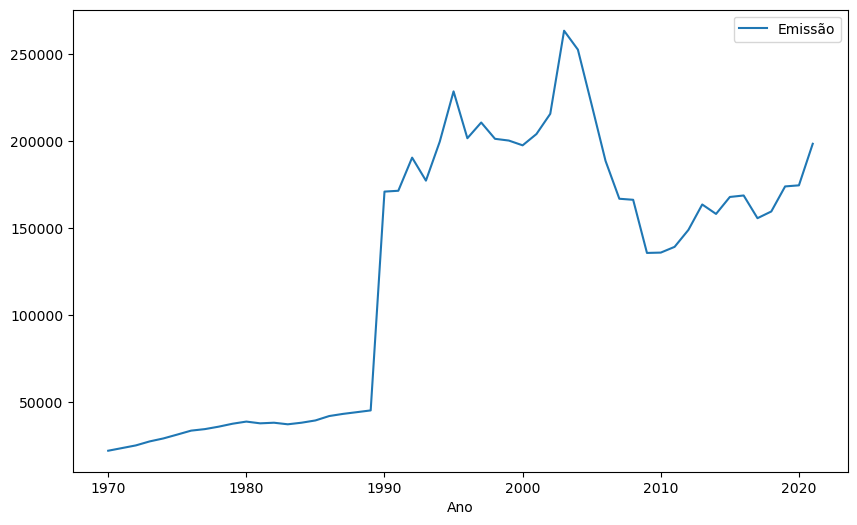

In [55]:
# Agrupa por ano e seleciona a coluna com valores para o gráfico
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().plot(figsize=(10, 6));

In [ ]:
# Fazendo com Plotly

grafico_linha = emissoes_por_ano.groupby('Ano')[['Emissão']].mean().reset_index() # Ajusta o index para criar gráfico

fig = px.line(grafico_linha, x='Ano', y='Emissão', title='Média da emissão de todos os gases por Ano')
fig.update_traces(line=dict(color='red', dash='dot'))
fig.show()

Gráfico de barras empilhadas com Plotly

In [ ]:
# Armazena em variável as informações que interessam e ajusta o index
grafico_barras_emp = emissoes_por_ano.groupby(['Gás', 'Ano'])[['Emissão']].mean().reset_index()
grafico_barras_emp

,Gás,Ano,Emissão
0,C2F6 (t),1970,0.232610
1,C2F6 (t),1971,0.334611
2,C2F6 (t),1972,0.404684
3,C2F6 (t),1973,0.463147
4,C2F6 (t),1974,0.471026
...,...,...,...
1191,SF6 (t),2017,4.700000
1192,SF6 (t),2018,4.835000
1193,SF6 (t),2019,4.970000
1194,SF6 (t),2020,5.105000


In [81]:
fig = px.bar(grafico_barras_emp, x='Ano', y='Emissão', color='Gás', title='Evolução da Emissão média dos Gases por Ano')
fig.show()

Construindo um gráfico de linha com uma linha para cada Gás

In [87]:
media_emissao_anual = emissoes_por_ano.groupby(['Ano', 'Gás'])[['Emissão']].mean().reset_index()
media_emissao_anual

,Ano,Gás,Emissão
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1471.024024
3,1970,CO (t),2155.556658
4,1970,CO2 (t),19244.913199
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.295311
1194,2021,NOx (t),679.395431


In [ ]:
# Transforma coluna com todos os gases em uma coluna para cada gás
media_emissao_anual = media_emissao_anual.pivot_table(index='Ano', columns='Gás', values='Emissão')
media_emissao_anual

In [ ]:
media_emissao_anual.plot(subplots=True, figsize=(10, 40))

In [92]:
media_emissao_anual = media_emissao_anual.reset_index()
media_emissao_anual.head()

Gás,Ano,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
0,1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,...,742.074863,0.0,0.0,0.0,0.0,0.0,0.0,31.632709,154.072797,0.0
1,1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,...,730.119047,0.0,0.0,0.0,0.0,0.0,0.0,32.609237,170.550178,0.0
2,1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,...,774.278817,0.0,0.0,0.0,0.0,0.0,0.0,34.311864,188.856161,0.0
3,1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,...,796.866394,0.0,0.0,0.0,0.0,0.0,0.0,35.278689,217.320480,0.0
4,1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,...,1024.694923,0.0,0.0,0.0,0.0,0.0,0.0,37.098183,247.521415,0.0


In [93]:
# Fazendo com plotly:
fig3 = px.line(media_emissao_anual, x='Ano', y=media_emissao_anual.columns[2:],
               title='Emissões por Gás ao longo dos Anos')
fig3.show()

# Seção de exercícios

### Desafio: hora da prática - 01. Conhecendo os dados

1. Encontre os valores únicos das colunas "Nível 1 - Setor" e "Estado" para identificar as atividades econômicas presentes na base de dados e se todos os Estados do Brasil estão presentes no DataFrame.

In [43]:
data['Nível 1 - Setor'].unique()

array(['Processos Industriais', 'Agropecuária', 'Energia', 'Resíduos ',
       'Mudança de Uso da Terra e Floresta'], dtype=object)

In [44]:
data['Estado'].unique()

array(['SP', 'BA', 'RJ', 'MG', 'SE', 'PR', nan, 'RO', 'AM', 'PA', 'TO',
       'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'MT', 'MS', 'GO', 'DF',
       'ES', 'SC', 'RS', 'AC', 'AP', 'RR'], dtype=object)

In [45]:
print(f"Checando se todos os estados do Brasil estão nessa coluna, será verdadeiro se o valor for igual a 27, que é a quantidade de estados no Brasil.",
      "Quantidade de estados:", data['Estado'].nunique())

Checando se todos os estados do Brasil estão nessa coluna, será verdadeiro se o valor for igual a 27, que é a quantidade de estados no Brasil. Quantidade de estados: 27


2. Filtre o DataFrame somente com os dados dos Estados da região Sul do Brasil.

In [46]:
data.loc[data['Estado'].isin(['PR', 'SC', 'RS']), 'Estado'].unique()

array(['PR', 'SC', 'RS'], dtype=object)

3. Filtre o DataFrame para exibir apenas os registros em que o campo "Nível 1 - Setor" seja igual a "Mudança de Uso da Terra e Floresta" e o campo "Estado" seja igual a "AM" (sigla para o Estado do Amazonas).

In [47]:
# data.loc[data['Nível 1 - Setor'] == 'Mudança de Uso da Terra e Floresta'] & (data['Estado'] == 'AM')

4. Encontre o valor máximo de emissão do ano de 2021 para os dados de "Agropecuária" no Estado do Pará.

In [48]:
data[2021].max()

199361267.0

In [49]:
data.loc[(data['Nível 1 - Setor'] == 'Agropecuária') & (data['Estado'] == 'PA'), 2021].max()

36856969.7986

### Desafio: hora da prática - 02. Agrupamento de dados

1. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para visualizar o dicionário contendo as chaves de grupos formados e a lista de índices de cada grupo.

In [50]:
emissoes_por_ano.groupby('Nível 1 - Setor').groups

{'Agropecuária': [1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, ...], 'Energia': [23277, 23278, 23279, 23280, 23281, 23282, 23283, 23284, 23285, 23286, 23287, 23288, 23289, 23290, 23291, 23292, 23293, 23294, 23295, 23296, 23297, 23298, 23299, 23300, 23301, 23302, 23303, 23304, 23305, 23306, 23307, 23308, 23309, 23310, 23311, 23312, 23313, 23314, 23315, 23316, 23317, 23318, 23319, 23320, 23321, 23322, 23323, 23324, 23325, 23326, 23327, 23328, 

2. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" e localize os dados do grupo "Agropecuária".

In [51]:
emissoes_por_ano.groupby('Nível 1 - Setor').get_group('Agropecuária')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
1137,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AC,AGR,ALIM_BEBIDAS,1970,0.000000
1138,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AL,AGR,ALIM_BEBIDAS,1970,2050.445805
1139,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AM,AGR,ALIM_BEBIDAS,1970,0.000000
1140,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AP,AGR,ALIM_BEBIDAS,1970,0.000000
1141,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),BA,AGR,ALIM_BEBIDAS,1970,466.934705
...,...,...,...,...,...,...,...,...,...,...,...,...
4855420,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),RS,AGR,ALIM_BEBIDAS,2021,929.545042
4855421,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SC,AGR,ALIM_BEBIDAS,2021,295.813919
4855422,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SE,AGR,ALIM_BEBIDAS,2021,32.734589
4855423,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SP,AGR,ALIM_BEBIDAS,2021,653.155812


3. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a média de emissão de cada setor no ano de 2021.

In [52]:
emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby('Nível 1 - Setor')[['Emissão']].mean()

,Emissão
Nível 1 - Setor,
Agropecuária,149793.768835
Energia,72928.637234
Mudança de Uso da Terra e Floresta,690085.511209
Processos Industriais,787101.255789
Resíduos,106106.723386


4. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a soma de emissão de cada setor. Ordene os dados da maior para menor emissão.

In [53]:
emissoes_por_ano.groupby('Nível 1 - Setor')[['Emissão']].sum().sort_values('Emissão', ascending=False)

,Emissão
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,3.524898e+11
Energia,1.205314e+11
Agropecuária,1.147284e+11
Processos Industriais,2.849965e+10
Resíduos,1.034465e+10


### Desafio: emissão por setor econômico - 03. Agrupamentos multi-index

Uma das tarefas passadas pela equipe de supervisão do órgão ambiental era de encontrar a emissão média de cada gás por ano. Conseguimos realizar essa tarefa usando o método groupby() e pivot_table() para gerar uma tabela contendo a emissão ao longo dos anos para cada um dos gases.

A equipe de supervisão deseja saber agora a média de emissão para cada um dos setores econômicos da coluna "Nível 1 - Setor" ao longo dos anos. Como desafio, crie uma tabela de pivô e uma visualização gráfica contendo essas informações, utilizando apenas o método pivot_table para a construção da tabela, sem utilizar o método groupby.

Você pode buscar informações de como fazer isso na documentação Pandas sobre o método pivot_table (https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html).

In [ ]:
# Seleciona index, colunas alvo, valor e aggfunc mean
media_emissao_setores_anual = emissoes_por_ano.pivot_table(index = 'Ano', columns=['Nível 1 - Setor'], values='Emissão', aggfunc='mean')
media_emissao_setores_anual

Nível 1 - Setor,Agropecuária,Energia,Mudança de Uso da Terra e Floresta,Processos Industriais,Resíduos
Ano,,,,,
1970,49292.425313,15939.703116,0.000000e+00,106549.168676,11684.883558
1971,51199.559433,17698.989894,0.000000e+00,111532.507753,12676.706849
1972,53508.935498,19092.876761,0.000000e+00,125701.525455,13709.697850
1973,55494.006224,22062.085929,0.000000e+00,137657.110402,14715.248028
1974,57896.513900,23810.659474,0.000000e+00,149941.779638,15710.616150
1975,63303.098508,25036.433686,0.000000e+00,168471.860169,16667.446706
1976,66347.533521,27214.281091,0.000000e+00,193826.482068,17539.505222
1977,66977.413505,27645.258640,0.000000e+00,231505.609283,18462.455148
1978,66640.432009,29734.461056,0.000000e+00,255736.210711,19327.840165


In [109]:
media_emissao_setores_anual = media_emissao_setores_anual.reset_index()
media_emissao_setores_anual.head()

Nível 1 - Setor,Ano,Agropecuária,Energia,Mudança de Uso da Terra e Floresta,Processos Industriais,Resíduos
0,1970,49292.425313,15939.703116,0.0,106549.168676,11684.883558
1,1971,51199.559433,17698.989894,0.0,111532.507753,12676.706849
2,1972,53508.935498,19092.876761,0.0,125701.525455,13709.697850
3,1973,55494.006224,22062.085929,0.0,137657.110402,14715.248028
4,1974,57896.513900,23810.659474,0.0,149941.779638,15710.616150


In [110]:
# Cria gráfico

fig4 = px.line(media_emissao_setores_anual, x='Ano', y=media_emissao_setores_anual.columns[2:])
fig4.show()

### Desafio: hora da prática - 03. Agrupamentos multi-index